**Sprawozdanie lab6 Krzysztof Kucaba**

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize
import scipy.interpolate
import time
import functools
import operator
from scipy.stats import norm

<a id='zad1'></a>
***Zadanie 1.***  

In [2]:
#lambda z tablicy współczynników
def wielf(w):
    n=len(w)
    wiel= lambda x: functools.reduce(operator.add,([w[i]*math.pow(x,n-i-1) for i in range(n)]))
    return wiel

#funkcja pierwotna z tablicy współczynników
def fpierwwiel(x):
    n=len(x)
    f=[0 for i in range(n+1)]
    for i in range(n):
        f[i]=1/(n-i)*x[i]
    f[n]=0
    return f



def prostokaty(f,a,b,n=20):
    całka=0
    dx=abs((b-a)/n)
    
    for x in range(0,n):
        całka=całka + f(a+(x+0.5)*dx)*dx
    return całka

def trapezy(f,a,b,n=20):
    całka=0
    dx=abs((b-a)/n)
    
    for x in range(0,n):
        całka=całka + (f(a+x*dx)+f(a+(x+1)*dx))*dx/2
    return całka

def simpson(f,a,b,n=20):
    całka = 0
    dx=abs((b-a)/n)
    for x in range(0,n):
        p=[x*dx, (x+0.5)*dx, (x+1)*dx]
        y=[f(val) for val in p]
        w=np.polyfit(p,y,deg=2)
        pierw=wielf(fpierwwiel(w))
        całka+=pierw((x+1)*dx)-pierw(x*dx)
    return całka
    

a=0
b=1
f=lambda x: math.pow(math.e,-2*x)
fpierw=lambda x: (-1/2)*math.pow(math.e,-2*x)


text=['metoda analityczna:      {0}',
      'metoda prostokątów:      {0}',
      'prosty wzór trapezów:    {0}',
      'prosty wzór Simpsona:    {0}',
      'złożony wzór trapezów:   {0}',
      'złożony wzór Simpsona:   {0}',
      'metoda Romberga:         {0}',
      'funkcja quad:            {0}']

results=[0 for i in range(8)]
results[0]=fpierw(b)-fpierw(a)

results[1]=prostokaty(f,0,1)
results[2]=trapezy(f,0,1,n=1)
results[3]=simpson(f,0,1,n=1)
results[4]=trapezy(f,0,1,n=10)
results[5]=simpson(f,0,1,n=10)
results[6]=scipy.integrate.romberg(f,a,b,tol=10**-6)
results[7]=scipy.integrate.quad(f,a,b)[0]

error=[i for i in range(8)]

for i in range(8):
    error[i]=abs(results[0] -results[i])
    

print('Wartości całki:')
for i in range(8):
    print(text[i].format(results[i]))
    
print('\nWartości błędu bezwzględnego:')
for i in range(8):
    print(text[i].format(error[i]))
    
print("\nnajdokładniejsza jest funkcja quad")
print("następna jest metoda Romberga a potem złożony wzór Simpsona")



Wartości całki:
metoda analityczna:      0.43233235838169365
metoda prostokątów:      0.4321522724255789
prosty wzór trapezów:    0.5676676416183064
prosty wzór Simpsona:    0.43447550798706325
złożony wzór trapezów:   0.4337725064184668
złożony wzór Simpsona:   0.43233259828070303
metoda Romberga:         0.43233235838943557
funkcja quad:            0.4323323583816936

Wartości błędu bezwzględnego:
metoda analityczna:      0.0
metoda prostokątów:      0.00018008595611473943
prosty wzór trapezów:    0.13533528323661276
prosty wzór Simpsona:    0.0021431496053695986
złożony wzór trapezów:   0.00144014803677317
złożony wzór Simpsona:   2.3989900937992914e-07
metoda Romberga:         7.741918217618604e-12
funkcja quad:            5.551115123125783e-17

najdokładniejsza jest funkcja quad
następna jest metoda Romberga a potem złożony wzór Simpsona


<a id='zad2'></a>
***Zadanie 2.*** 

In [3]:

f = lambda x: (1/math.sqrt(2*math.pi)*math.pow(math.e,-0.5*math.pow(x,2)))
całka=lambda x: trapezy(f,0,x)-0.45
p0=0.5

x0=scipy.optimize.newton(całka,p0,fprime=f,tol=10**-5)
print("wynik dla metody trapezów:          {0}".format(x0))

całka=lambda x: simpson(f,0,x)-0.45

x0=scipy.optimize.newton(całka,p0,fprime=f,tol=10**-5)
print("wynik dla złożonego wzoru Simpsona: {0}".format(x0))
print("dokładny wynik:                     {0}".format(norm().isf(0.05)))

print("\nwynik dla wzoru Simpsona jest dokładniejszy od metody trapezów o 5 miejsc po przecinku")

wynik dla metody trapezów:          1.6457816484123453
wynik dla złożonego wzoru Simpsona: 1.6448536192825498
dokładny wynik:                     1.6448536269514729

wynik dla wzoru Simpsona jest dokładniejszy od metody trapezów o 5 miejsc po przecinku


<a id='zad3'></a>
***Zadanie 3.***  

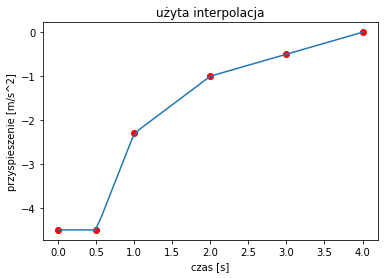

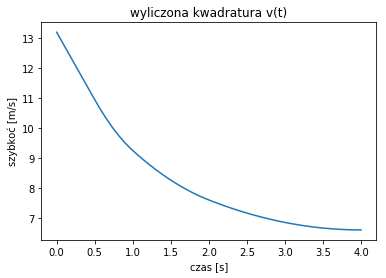

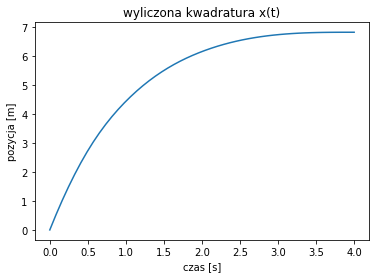

droga hamowania wynosi: 6.825000000000001[m]
średnia prędkość w czasie [0s,0.5s] wynosi: 5.475m/s


In [4]:
def fspline(coeffs,splits,x):
    for i in range(1,len(splits)):
        if(x<=splits[i] ):
            return wielf(coeffs[i-1])(x)
    return 0

def całkujspline(coeffs,splits):
    coeffs=list(coeffs)
    for i in range(len(coeffs)):
        coeffs[i]=fpierwwiel(coeffs[i])
        if(i>0):
            coeffs[i][len(coeffs[i])-1]=wielf(coeffs[i-1])(splits[i])-wielf(coeffs[i])(splits[i])
    return coeffs

def ustawC(coeffs,splits,C):
    coeffs=list(coeffs)
    for i in range(len(coeffs)):
        coeffs[i][len(coeffs[i])-1]+=C
    return coeffs

        
        
t=[0   ,0.5 ,1   ,2   ,3   ,4]
a=[-4.5,-4.5,-2.3,-1.0,-0.5,0]

x=np.linspace(min(t),max(t))

coeffs=[np.polyfit([t[i],t[i+1]],[a[i],a[i+1]],deg=1) for i in range(len(t)-1)]
y=[fspline(coeffs,t,i) for i in x]

plt.plot(t,a,'ro')
plt.plot(x,y)
plt.title('użyta interpolacja')
plt.xlabel("czas [s]")
plt.ylabel("przyspieszenie [m/s^2]")
plt.show()

coeffs=całkujspline(coeffs,t)
v0=-fspline(coeffs,t,max(t))
coeffs=ustawC(coeffs,t,v0)
y=[v0+fspline(coeffs,t,i) for i in x]

plt.plot(x,y)
plt.title('wyliczona kwadratura v(t)')
plt.xlabel("czas [s]")
plt.ylabel("szybkoć [m/s]")
plt.show()

coeffs=całkujspline(coeffs,t)
y=[fspline(coeffs,t,i) for i in x]

plt.plot(x,y)
plt.title('wyliczona kwadratura x(t)')
plt.xlabel("czas [s]")
plt.ylabel("pozycja [m]")
plt.show()

print("droga hamowania wynosi: {0}[m]".format(fspline(coeffs,t,max(t))))
print("średnia prędkość w czasie [0s,0.5s] wynosi: {0}m/s".format((fspline(coeffs,t,0.5)-fspline(coeffs,t,0))/0.5))


<a id='zad4'></a>
***Zadanie 4.***  

złożony wzór trapezów:   11.06348478089565
złożony wzór Simpsona:   11.063484780924407
metoda Romberga:         15.825159885482952


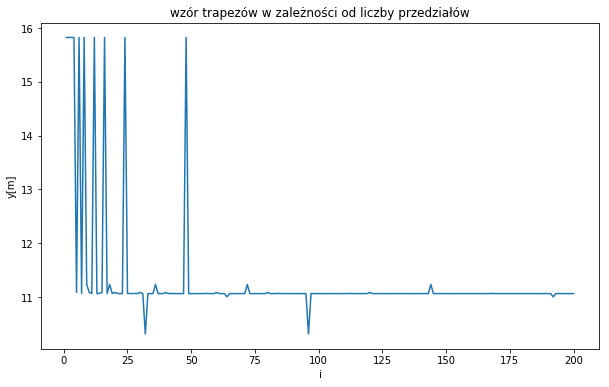

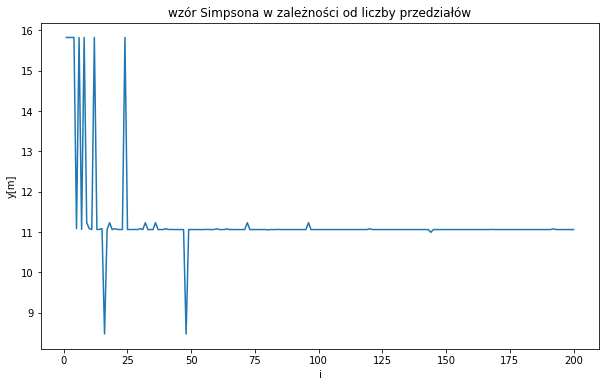

metody trapezów i Simpsona posiadają pewne małoliczne podziały dla których są bardzo niedokładne przy funkcjach oscylujących 
wynik otrzymany przy pomocy metody Romberga znacząco się różni, przy zwiększaniu ilości iteracji wynik
metody trapezów i Simpsona nie zwiększa się, można więc stwierdzić że wynik metody Romberga jest niepoprawny


In [5]:
A=0.1
T=0.2

f=lambda x: A*math.sin(2*math.pi*x/T)
fprim=lambda x: (2*math.pi/T)*A*math.cos(2*math.pi*x/T)
fkrzywa=lambda x: math.sqrt(1+math.pow(fprim(x),2))
a=0
b=4.8

print('złożony wzór trapezów:   {0}'.format(trapezy(fkrzywa,a,b,n=200)))
print('złożony wzór Simpsona:   {0}'.format(simpson(fkrzywa,a,b, n=200)))
print('metoda Romberga:         {0}'.format(scipy.integrate.romberg(fkrzywa,a,b,tol=10**-1)))


plt.figure(figsize=(10,6))
i=range(1,201)
y=[0 for j in i]
for j in i:
    y[j-1]=trapezy(fkrzywa,a,b,n=j)
    
plt.plot(i,y)
plt.title("wzór trapezów w zależności od liczby przedziałów")
plt.xlabel("i")
plt.ylabel("y[m]")
plt.show()

plt.figure(figsize=(10,6))
y=[0 for j in i]
for j in i:
    y[j-1]=simpson(fkrzywa,a,b,n=j)
    
plt.plot(i,y)
plt.title("wzór Simpsona w zależności od liczby przedziałów")
plt.xlabel("i")
plt.ylabel("y[m]")
plt.show()

print("metody trapezów i Simpsona posiadają pewne małoliczne podziały dla których są bardzo niedokładne przy funkcjach oscylujących ")
print("wynik otrzymany przy pomocy metody Romberga znacząco się różni, przy zwiększaniu ilości iteracji wynik")
print("metody trapezów i Simpsona nie zwiększa się, można więc stwierdzić że wynik metody Romberga jest niepoprawny")

